In [1]:
import dlib
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

import torch
import torchvision
from torchvision import models
import torchvision.transforms as T
from PIL import Image
import os

c:\Users\th070\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
Detector = dlib.get_frontal_face_detector()
Predictor = dlib.shape_predictor(r'E:\GithubProjects\KagglePractice\HelmetDetection\models\shape_predictor_68_face_landmarks.dat')

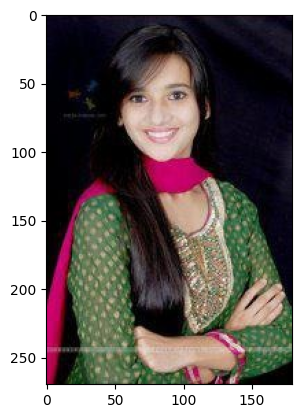

In [5]:
img = cv.imread(r'E:\GithubProjects\KagglePractice\HelmetDetection\RawDatasets\0.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [13]:
ColorArray = np.array([
	(0, 0, 0),       # 0=background
	(0, 0, 0),       # 1=aeroplane
	(0, 0, 0),       # 2=bicycle
	(0, 0, 0),       # 3=bird
	(0, 0, 0),       # 4=boat
	(0, 0, 0),       # 5=bottle
	(0, 0, 0),       # 6=bus
	(0, 0, 0),       # 7=car
	(0, 0, 0),       # 8=cat
	(0, 0, 0),       # 9=chair
	(0, 0, 0),       # 10=cow
	(0, 0, 0),       # 11=dining table
	(0, 0, 0),       # 12=dog
	(0, 0, 0),       # 13=horse
	(0, 0, 0),       # 14=motorbike
	(255, 255, 255), # 15=person
	(0, 0, 0),       # 16=potted plant
	(0, 0, 0),       # 17=sheep
	(0, 0, 0),       # 18=sofa
	(0, 0, 0),       # 19=train
	(0, 0, 0),       # 20=tv/monitor
])

deeplab = models.segmentation.deeplabv3_resnet101(pretrained=True).eval()
def seg_map(img, n_classes=21):
	global ColorArray

	rgb = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

	for c in range(n_classes):
		idx = img == c

		rgb[idx] = ColorArray[c]

	return rgb

def SaveClearImage(ImagePos, SavePos):
	IMG_SIZE = 480

	Height, Width = cv.imread(ImagePos).shape[:2]
	img = Image.open(ImagePos).resize((600, 450))

	trf = T.Compose([
		T.Resize(IMG_SIZE),
		T.ToTensor(),
		T.Normalize(
			mean=[0.485, 0.456, 0.406],
			std=[0.229, 0.224, 0.225]
		)
	])

	input_img = trf(img).unsqueeze(0)

	out = deeplab(input_img)['out']

	out = torch.argmax(out.squeeze(), dim=0)
	out = out.detach().cpu().numpy()

	out_seg = seg_map(out)
	ClearImage = Image.fromarray(img.resize((640, 480)) & out_seg).resize((Width,Height))

	cv.imwrite(SavePos, cv.cvtColor(np.asarray(ClearImage), cv.COLOR_BGR2RGB))

c:\Users\th070\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\th070\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
TopPos = r'E:\GithubProjects\KagglePractice\HelmetDetection\RawDatasets'
SaveTopPos = r'E:\GithubProjects\KagglePractice\HelmetDetection\Datasets\cleared'
Items = os.listdir(TopPos)

In [14]:
for i, pos in enumerate(Items):
	SaveClearImage(fr"{TopPos}\{pos}",fr"{SaveTopPos}\{pos}")
	print(f"\r{i} / {len(Items)} 완료",end='')

685 / 686 완료

1시간 7분 5초만에 끝났다